<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p>استفاده از زیرساخت‌های مسیریابی برای تولید دینامیک URLها استفاده کنید، بدون نیاز به کدنویسی دستی و پرهیز از خطاهای رایج.</p>

<ol><li><p><strong>انعطاف‌پذیری URLها:</strong> یکی از مزایای استفاده از زیرساخت مسیریابی در ASP.NET Core این است که URLهای شما می‌توانند انعطاف‌پذیر باشند. شما می‌توانید قالب‌های مسیر (route templates) را به هر شکلی که می‌خواهید تغییر دهید (برای مثال، تغییر /cart به /basket) بدون اینکه خطای کامپایل رخ دهد.</p></li><li><p><strong>لینک‌دهی بین نقاط پایانی:</strong> در برنامه‌هایتان، معمولاً نیاز دارید تا به یک نقطه پایانی از نقطه پایانی دیگری لینک دهید. اگر این لینک‌ها را به صورت دستی مدیریت کنید، ممکن است منجر به بروز خطاهای فراوانی مانند لینک‌های خراب و خطاهای 404 شود. اگر URLها به صورت سخت‌کد شده باشند، باید در هر تغییر نام، همه موارد را پیدا کرده و جایگزین کنید.</p></li><li><p><strong>تولید دینامیک URLها:</strong> خوشبختانه، می‌توانید از زیرساخت مسیریابی برای تولید دینامیک URLهای مناسب در زمان اجرا استفاده کنید. این فرآیند شما را از زحمت مدیریت دستی لینک‌ها خلاص می‌کند و خطاهای احتمالی را کاهش می‌دهد.</p></li></ol>

<h5>فرآیند تولید URLها:</h5>
<ul><li><strong>معکوس فرآیند مسیریابی:</strong> تولید URLها از پارامترهای مسیر، به صورت مفهومی تقریباً معکوس فرآیند تطبیق یک URL به یک نقطه پایانی است. در فرآیند تطبیق URL، درخواست ورودی را به یک نقطه پایانی مناسب می‌رسانید. اما در تولید URLها، از پارامترهای مسیر و نام نقطه پایانی استفاده می‌کنید تا URL مناسبی برای لینک‌دهی به آن نقطه پایانی تولید کنید.</li></ul>
</div>

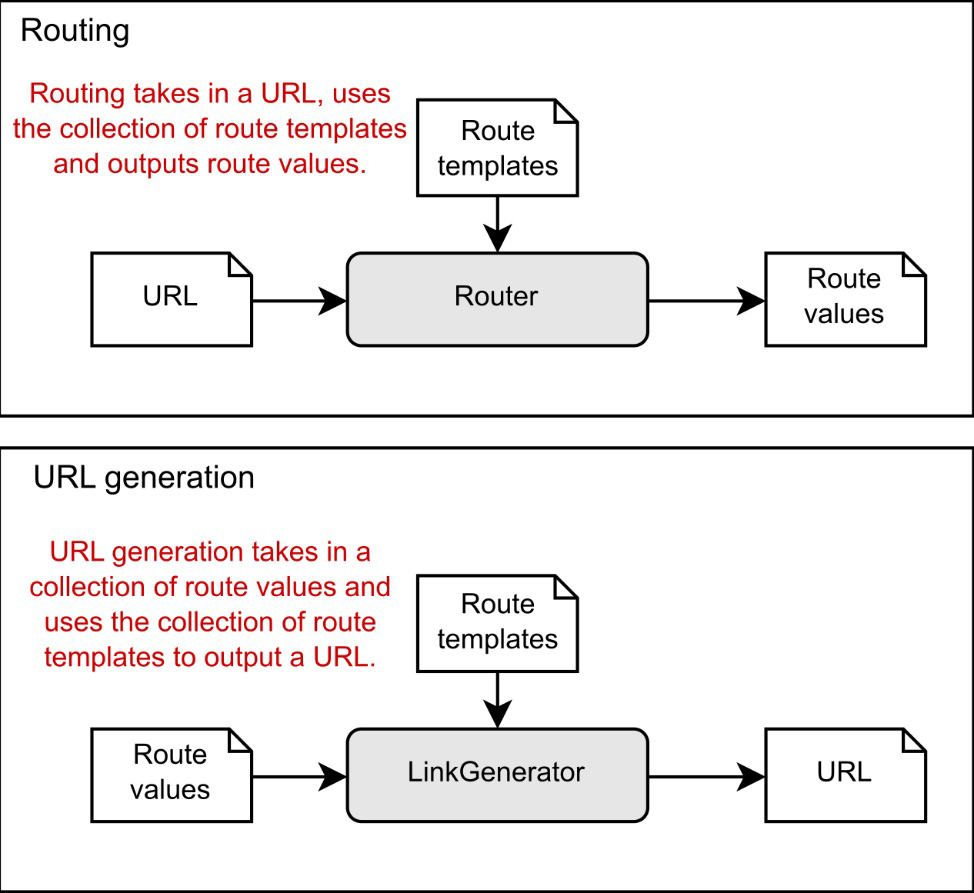

You can use the `LinkGenerator` class to generate URLs for your ***minimal APIs***.  
`GetPathByPage` method used for routing to ***Razor Pages***  
`GetPathByAction` method used for routing to ***MVC actions,***  

### Generating URLs for a minimal API

In [ ]:
app.MapGet("/product/{name}", (string name) 
    => $"The product is {name}") 
    .WithName("product"); 

app.MapGet("/links", (LinkGenerator links) =>
{
    string link = links.GetPathByName("product",
        new { name = "big-widget"}); 
        
    return $"View the product at {link}"; 
});

The `WithName()` method adds ***metadata*** to your endpoints  
***Endpoint names*** are `case-sensitive` (unlike the route templates themselves) and ***must be globally unique***.

In [ ]:
//generate complete URL
links.GetUriByName("product", new { Name = "super-fancy-widget"},
    "https", new HostString("localhost"));

some methods available on ***LinkGenerator*** take an `HttpContext`.  
These methods are often ***easier to use*** in an endpoint handler, as they extract
ambient values such as the `scheme` and `hostname` ***from*** the `incoming request` and reuse them for URL generation.

In [ ]:
var url = _linkGenerator.GetPathByAction(
    HttpContext, 
    action: "MyAction", 
    controller: "MyController");

if `route pattern` includes the defined `route value`  such as in the `/product/{name}` the ***route value*** will be **used in the URL path**, resulting in `/product/big-widget`  

If a route ***doesn’t contain the route value*** explicitly, as in the `/product` template, the ***route value*** is appended to the `query string` as additional data. as in `/product?name=big-widget`.

### Generating URLs with IResults

In [ ]:
app.MapGet("/test", () => "Hello world!")
    .WithName("hello");

app.MapGet("/redirect-me",
    () => Results.RedirectToRoute("hello")) 

`RedirectToRoute()` method takes the `name of the endpoint` and `any required
route parameters`, and generates a URL in a ***similar way to LinkGenerator***.  
  
***minimal API framework*** automatically sends the `generated URL as the response`

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<h5>RedirectToRoute():</h5>
<p>متد <code>RedirectToRoute</code> برای انتقال (redirect) کاربر به یک مسیر (route) دیگر استفاده می‌شود. به صورت پیش‌فرض، این متد یک پاسخ HTTP با کد وضعیت 302 (Found) ایجاد می‌کند و URL تولید شده را در هدر Location پاسخ قرار می‌دهد.</p>
<h5>پارامترهای <code>permanent</code> و <code>preserveMethod</code>:</h5>
<p>این دو پارامتر اختیاری هستند و به شما اجازه می‌دهند تا نوع ریدایرکت و کد وضعیت HTTP را تنظیم کنید.</p>

<ol><li><p><strong>permanent=false, preserveMethod=false — 302 Found</strong></p><ul><li>این تنظیم پیش‌فرض است. 302 به معنای این است که منبع به طور موقت منتقل شده است و مرورگر باید از روش HTTP GET برای درخواست جدید استفاده کند.</li></ul></li><li><p><strong>permanent=true, preserveMethod=false — 301 Moved Permanently</strong></p><ul><li>301 نشان‌دهنده این است که منبع به طور دائم به مکان جدید منتقل شده است. مرورگرها معمولاً این نوع ریدایرکت را ذخیره می‌کنند و در آینده به طور خودکار به URL جدید درخواست می‌فرستند. باز هم از روش HTTP GET برای درخواست جدید استفاده می‌شود.</li></ul></li><li><p><strong>permanent=false, preserveMethod=true — 307 Temporary Redirect</strong></p><ul><li>307 نشان‌دهنده یک انتقال موقت است، اما تفاوت آن با 302 این است که روش اصلی درخواست (مانند POST) حفظ می‌شود. مرورگرها باید از همان روش HTTP که در درخواست اصلی استفاده شده است، برای درخواست جدید استفاده کنند.</li></ul></li><li><p><strong>permanent=true, preserveMethod=true — 308 Permanent Redirect</strong></p><ul><li>308 مشابه 301 است، اما با این تفاوت که روش اصلی درخواست حفظ می‌شود. این یعنی اگر درخواست اصلی با POST بوده است، درخواست جدید هم باید با POST باشد.</li></ul></li></ol>
</div>

`Results.Redirect()` used for **redirect** to `url address`

###  Controlling your generated URLs with `RouteOptions`

In [ ]:
app.MapGet("/MyRoute", () => "Hello world!").WithName("route1");

LinkGenerator.GetPathByName("route1") //by default returns /MyRoute.

//if i want generate `/myroute` or `/MYROUTE` or `/myroute/` 

You can ***control the route generation*** rules by using `RouteOptions`.

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

builder.Services.Configure<RouteOptions>(o => 
{
    o.LowercaseUrls = true; 
    o.AppendTrailingSlash = true; 
    o.LowercaseQueryStrings = false; 
});

WebApplication app = builder.Build();

app.MapGet("/HealthCheck", () => Results.Ok()).WithName("healthcheck");

app.MapGet("/{name}", (string name) => name).WithName("product");

app.MapGet("/", (LinkGenerator links) =>
new []
{
    links.GetPathByName("healthcheck"),  //return /healthcheck/
    links.GetPathByName("product", 
    new { Name = "Big-Widget", Q = "Test"}) // return "/big-widget/?Q=Test"
});
app.Run();

`LinkOptions` **override** the ***default values ***set in `RouteOptions`.

In [ ]:
links.GetPathByName("healthcheck",
    options: new LinkOptions
    {
        LowercaseUrls = false,
        AppendTrailingSlash = false,
    }); //return "/HealthCheck" for previues example